Cat Dog Classifier Project

In [56]:
#!mkdir -p ~/.laggle
#!cp kaggle.json !/.kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:46<00:00, 24.3MB/s]
100% 1.06G/1.06G [00:46<00:00, 24.8MB/s]


In [3]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,Flatten,BatchNormalization,Dropout
from keras.layers import MaxPooling2D


In [5]:
#generators

train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size= 32,
    image_size=(256,256)
)


validation_ds = keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size= 32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
# Normalization
def process(image,label):
  image=tf.cast(image/255.,tf.float32)
  return image,label

train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)


In [7]:
# create cNN Model


model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [8]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [9]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 73s 101ms/step - loss: 1.5659 - accuracy: 0.5763 - val_loss: 0.6331 - val_accuracy: 0.6420
Epoch 2/10
625/625 [==============================] - 64s 102ms/step - loss: 0.5935 - accuracy: 0.6909 - val_loss: 0.9805 - val_accuracy: 0.6294
Epoch 3/10
625/625 [==============================] - 64s 102ms/step - loss: 0.5060 - accuracy: 0.7546 - val_loss: 0.5187 - val_accuracy: 0.7316
Epoch 4/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4460 - accuracy: 0.7912 - val_loss: 0.4537 - val_accuracy: 0.7950
Epoch 5/10
625/625 [==============================] - 64s 102ms/step - loss: 0.3814 - accuracy: 0.8321 - val_loss: 0.5445 - val_accuracy: 0.7944
Epoch 6/10
625/625 [==============================] - 63s 101ms/step - loss: 0.3161 - accuracy: 0.8645 - val_loss: 0.9198 - val_accuracy: 0.7216
Epoch 7/10
625/625 [==============================] - 65s 104ms/step - loss: 0.2451 - accuracy: 0.9004 - val_loss: 0.6348 - val_ac

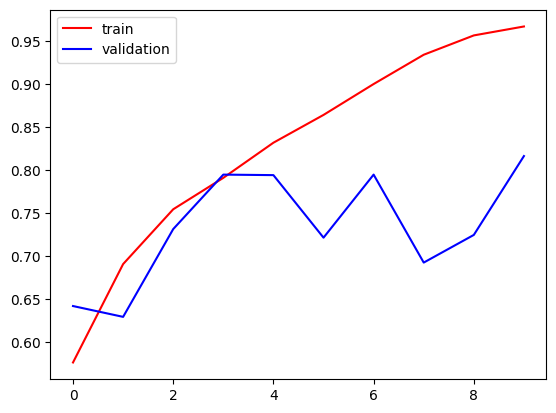

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

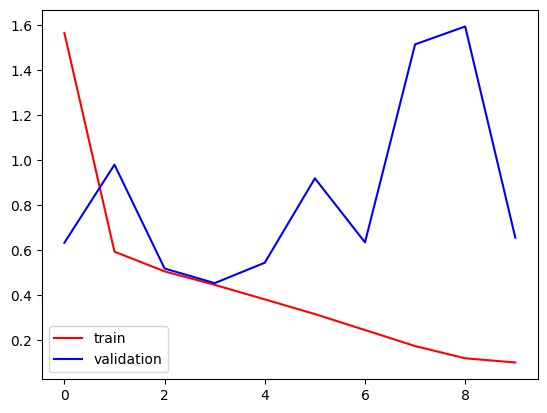

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [12]:
# ways to reduce overfitting

# add more data
# Data Augmentation -> next video

# L1/L2 Regularizer
#Dropout
#Batch Norm
#Reduce complexity



In [13]:
import cv2

In [49]:
test_img=cv2.imread('/content/catt.jpg')

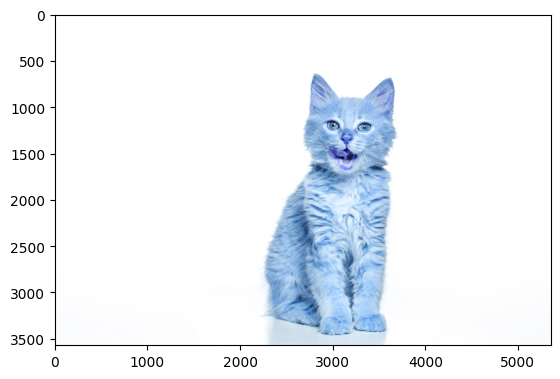

In [50]:
plt.imshow(test_img)

In [51]:
test_img.shape

(3571, 5356, 3)

In [52]:
test_img=cv2.resize(test_img,(256,256))

In [53]:
test_input=test_img.reshape((1,256,256,3))

In [54]:
model.predict(test_input)

1/1 [==============================] - 0s 34ms/step


array([[0.]], dtype=float32)